# import packages

In [1]:


exp_odir = 'output/echam-6.3.05p2-wiso/pi/'
expid = ['pi_m_502_5.0',]
i = 0

# -----------------------------------------------------------------------------
# region import packages

# management
import glob
import pickle
import warnings
warnings.filterwarnings('ignore')
import os
import sys  # print(sys.path)
sys.path.append('/work/ollie/qigao001')
os.chdir('/work/ollie/qigao001')

# data analysis
import numpy as np
import xarray as xr
import dask
dask.config.set({"array.slicing.split_large_chunks": True})
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()
from scipy import stats
import xesmf as xe
import pandas as pd
from metpy.interpolate import cross_section
from statsmodels.stats import multitest
import pycircstat as circ
from metpy.calc import pressure_to_height_std, geopotential_to_height
from metpy.units import units
from scipy.stats import pearsonr

# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib import cm
import cartopy.crs as ccrs
plt.rcParams['pcolor.shading'] = 'auto'
mpl.rcParams['figure.dpi'] = 600
mpl.rc('font', family='Times New Roman', size=10)
mpl.rcParams['axes.linewidth'] = 0.2
plt.rcParams.update({"mathtext.fontset": "stix"})
import matplotlib.animation as animation
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import cartopy.feature as cfeature

# self defined
from a_basic_analysis.b_module.mapplot import (
    globe_plot,
    hemisphere_plot,
    quick_var_plot,
    mesh2plot,
    framework_plot1,
    remove_trailing_zero,
    remove_trailing_zero_pos,
)

from a_basic_analysis.b_module.basic_calculations import (
    mon_sea_ann,
)

from a_basic_analysis.b_module.namelist import (
    month,
    month_num,
    month_dec,
    month_dec_num,
    seasons,
    seasons_last_num,
    hours,
    months,
    month_days,
    zerok,
    panel_labels,
    seconds_per_d,
)

from a_basic_analysis.b_module.source_properties import (
    source_properties,
    calc_lon_diff,
)

from a_basic_analysis.b_module.statistics import (
    fdr_control_bh,
    check_normality_3d,
    check_equal_variance_3d,
    ttest_fdr_control,
)

from a_basic_analysis.b_module.component_plot import (
    cplot_ice_cores,
    plt_mesh_pars,
    plot_t63_contourf,
)

# endregion
# -----------------------------------------------------------------------------




# import data

In [2]:
# -----------------------------------------------------------------------------
# region import data

# evaporation
evapwac_alltime = {}
with open(exp_odir + expid[i] + '/analysis/echam/' + expid[i] + '.evapwac_alltime.pkl', 'rb') as f:
    evapwac_alltime[expid[i]] = pickle.load(f)

# wind
wind10_alltime = {}
with open(exp_odir + expid[i] + '/analysis/echam/' + expid[i] + '.wind10_alltime.pkl', 'rb') as f:
    wind10_alltime[expid[i]] = pickle.load(f)

# humidity
rh2m_alltime = {}
with open(exp_odir + expid[i] + '/analysis/echam/' + expid[i] + '.rh2m_alltime.pkl', 'rb') as f:
    rh2m_alltime[expid[i]] = pickle.load(f)

q2m_alltime = {}
with open(exp_odir + expid[i] + '/analysis/echam/' + expid[i] + '.q2m_alltime.pkl', 'rb') as f:
    q2m_alltime[expid[i]] = pickle.load(f)

# temperature
temp2_alltime = {}
with open(exp_odir + expid[i] + '/analysis/echam/' + expid[i] + '.temp2_alltime.pkl', 'rb') as f:
    temp2_alltime[expid[i]] = pickle.load(f)

tsw_alltime = {}
with open(exp_odir + expid[i] + '/analysis/echam/' + expid[i] + '.tsw_alltime.pkl', 'rb') as f:
    tsw_alltime[expid[i]] = pickle.load(f)


lon = wind10_alltime[expid[i]]['am'].lon
lat = wind10_alltime[expid[i]]['am'].lat
lon_2d, lat_2d = np.meshgrid(lon, lat,)

'''
evapwac_alltime[expid[i]]['am'].to_netcdf('scratch/test/run/test.nc')
'''
# endregion
# -----------------------------------------------------------------------------


"\nevapwac_alltime[expid[i]]['am'].to_netcdf('scratch/test/run/test.nc')\n"

# plot

In [3]:
latitude = -40
longitude = 345

[########################################] | 100% Completed | 3.17 sms
[########################################] | 100% Completed | 5.29 sms


<AxesSubplot:>

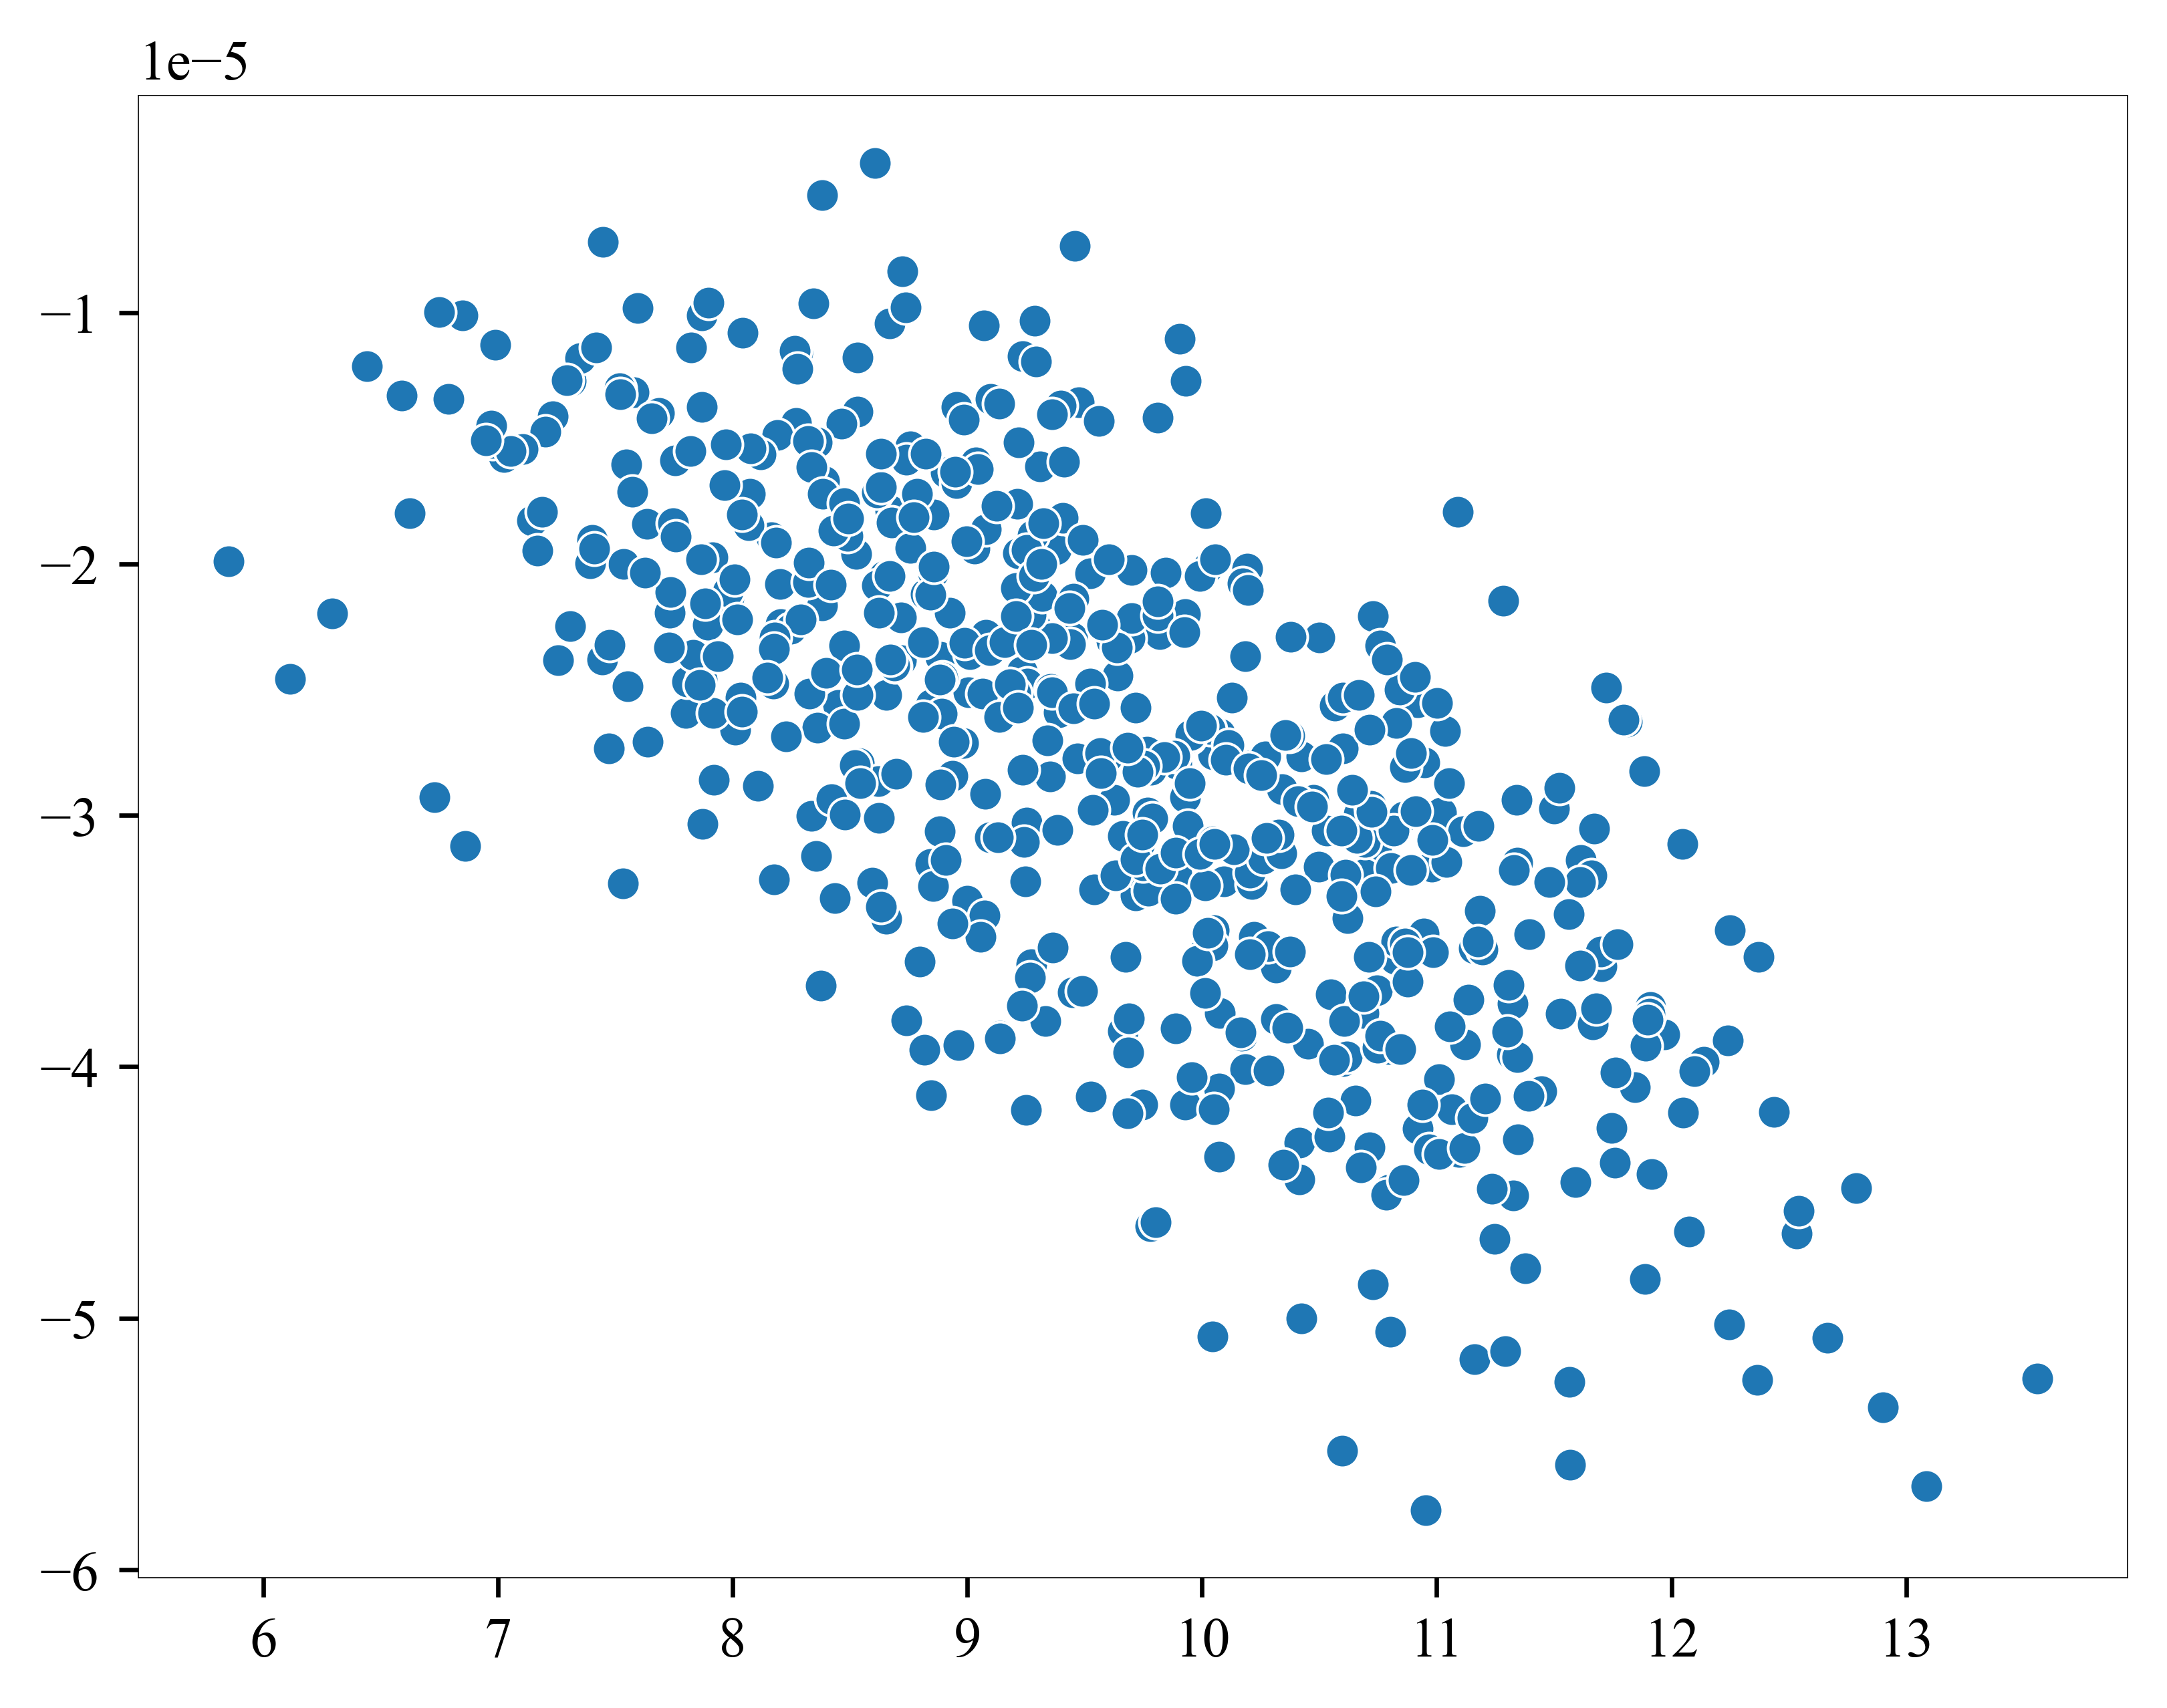

In [6]:
sns.scatterplot(
    wind10_alltime[expid[i]]['mon'].sel(
        lat=latitude, lon=longitude, method='nearest').values,
    evapwac_alltime[expid[i]]['mon'].sel(
        lat=latitude, lon=longitude, method='nearest').values,
)

[########################################] | 100% Completed | 3.08 sms
[########################################] | 100% Completed | 5.40 sms


<AxesSubplot:>

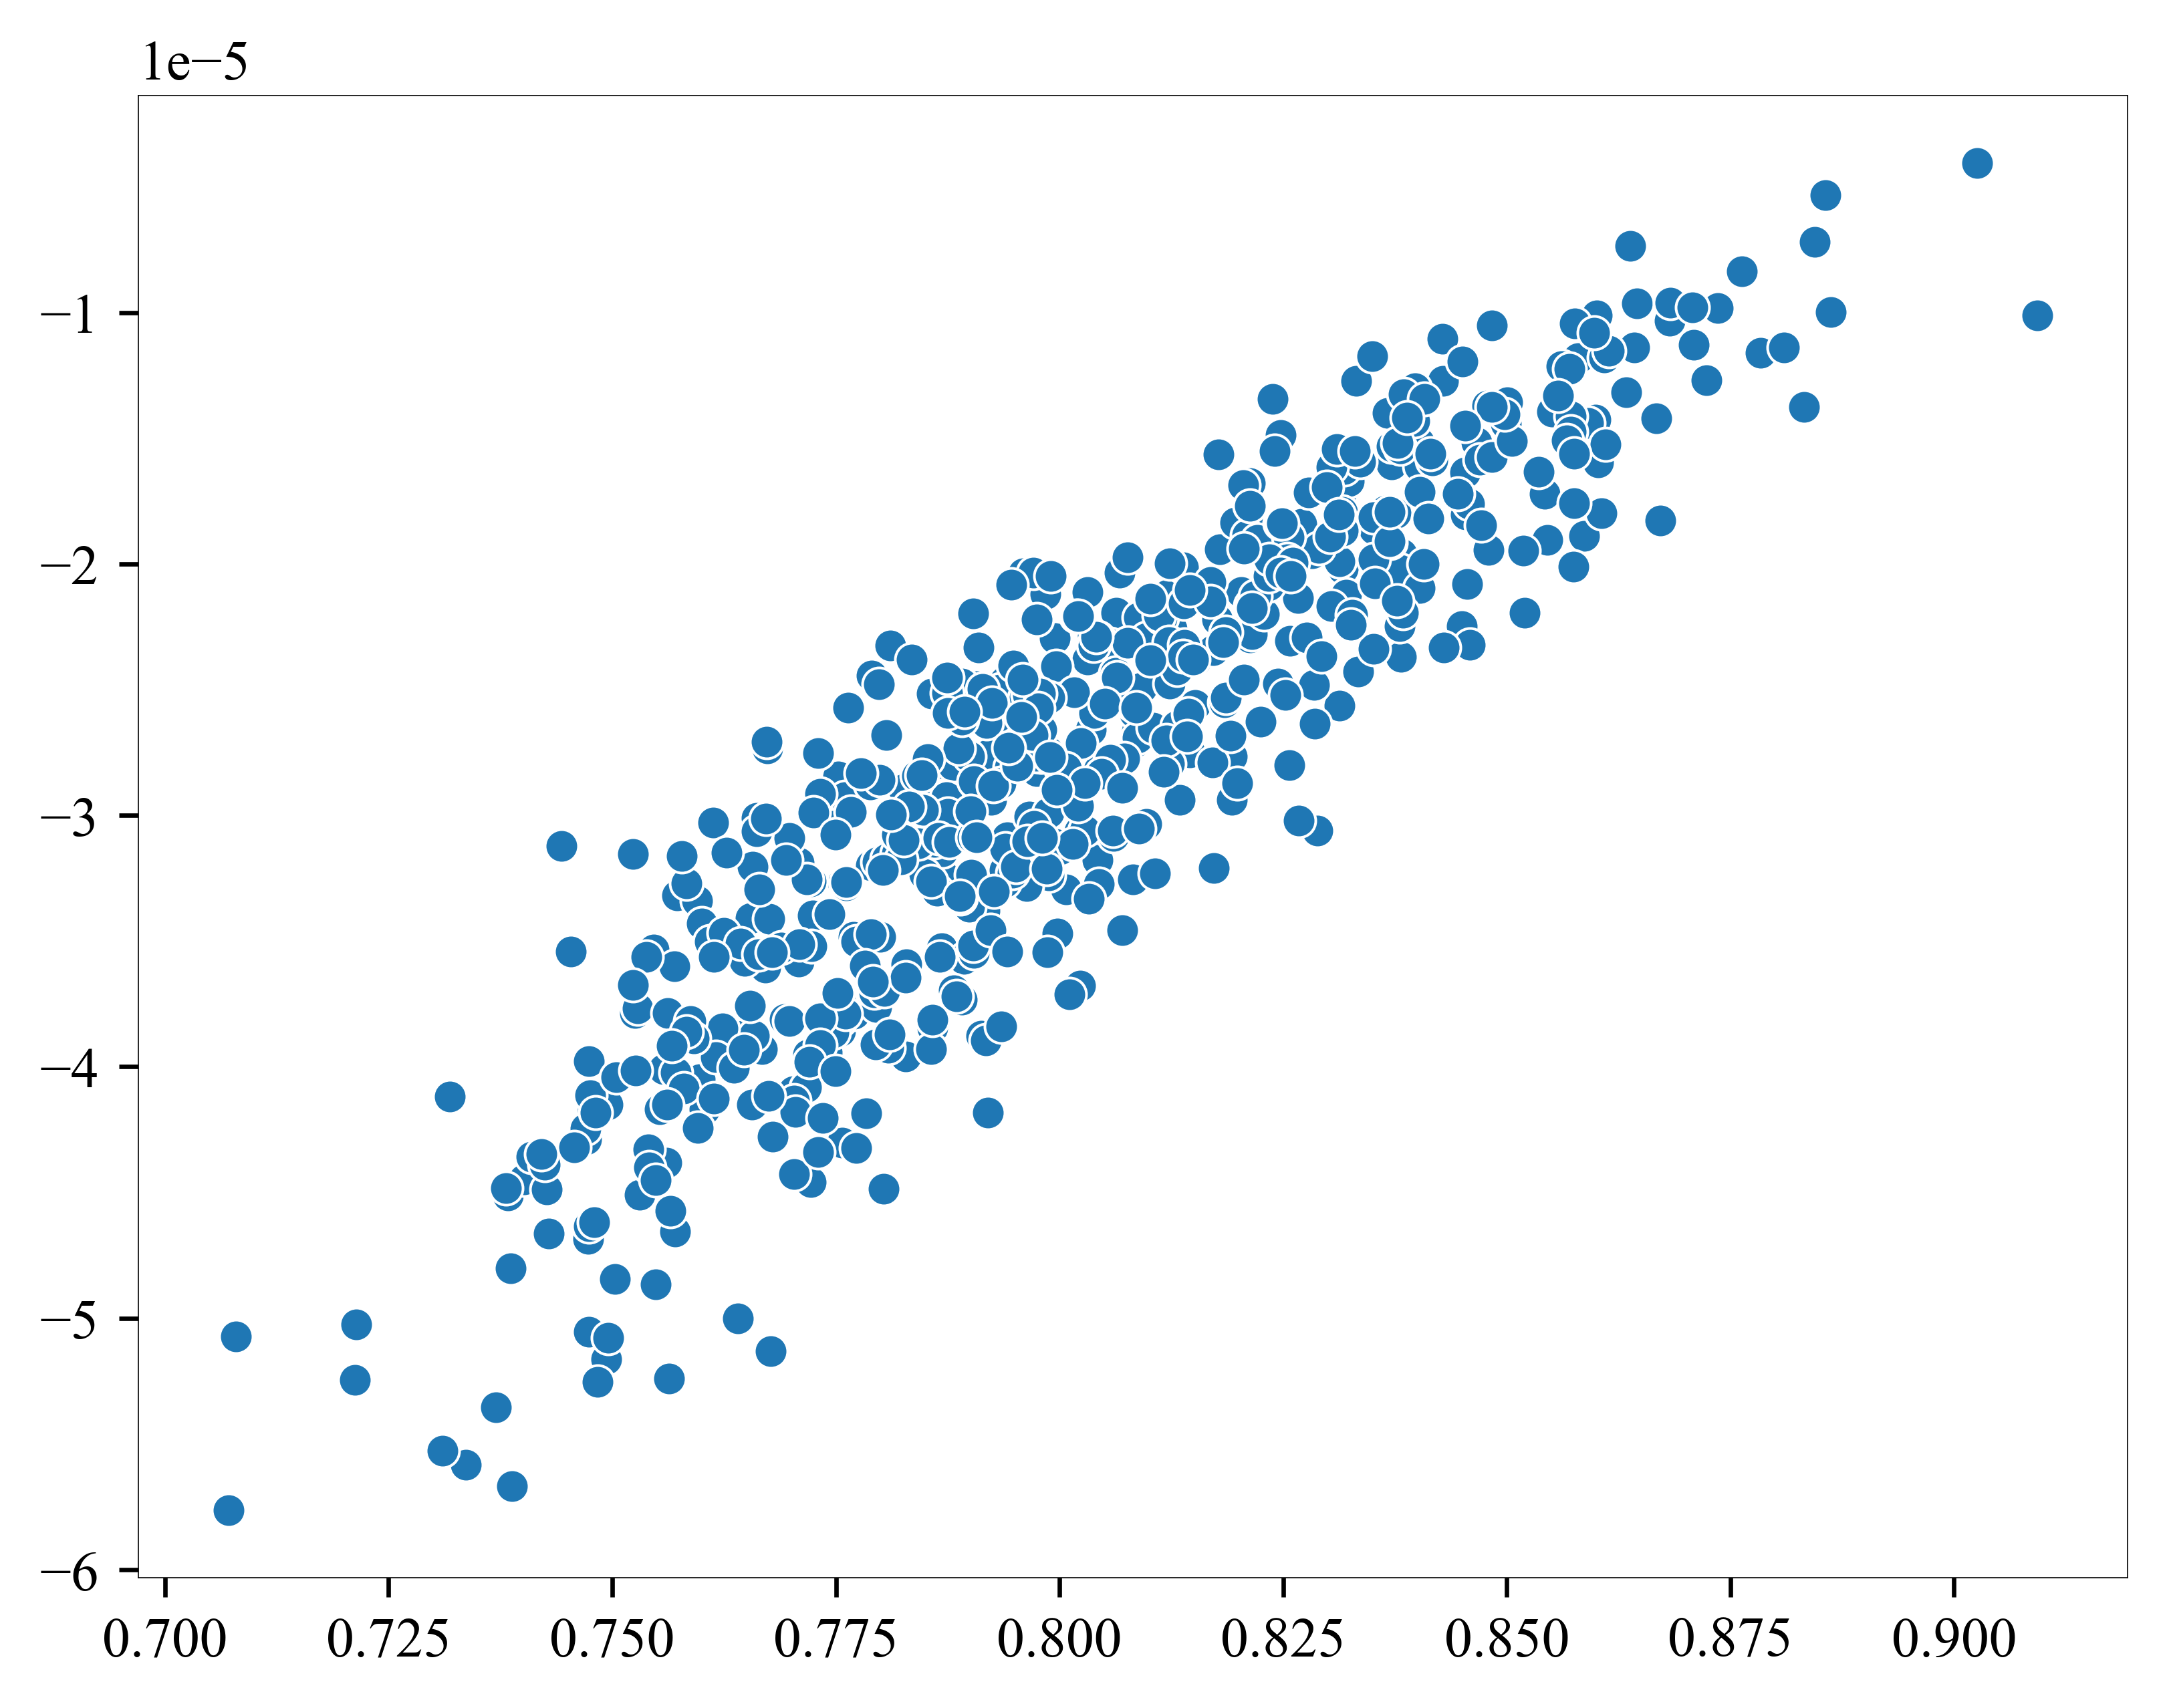

In [7]:
sns.scatterplot(
    rh2m_alltime[expid[i]]['mon'].sel(
        lat=latitude, lon=longitude, method='nearest').values,
    evapwac_alltime[expid[i]]['mon'].sel(
        lat=latitude, lon=longitude, method='nearest').values,
)

[########################################] | 100% Completed | 3.30 sms
[########################################] | 100% Completed | 5.09 sms


<AxesSubplot:>

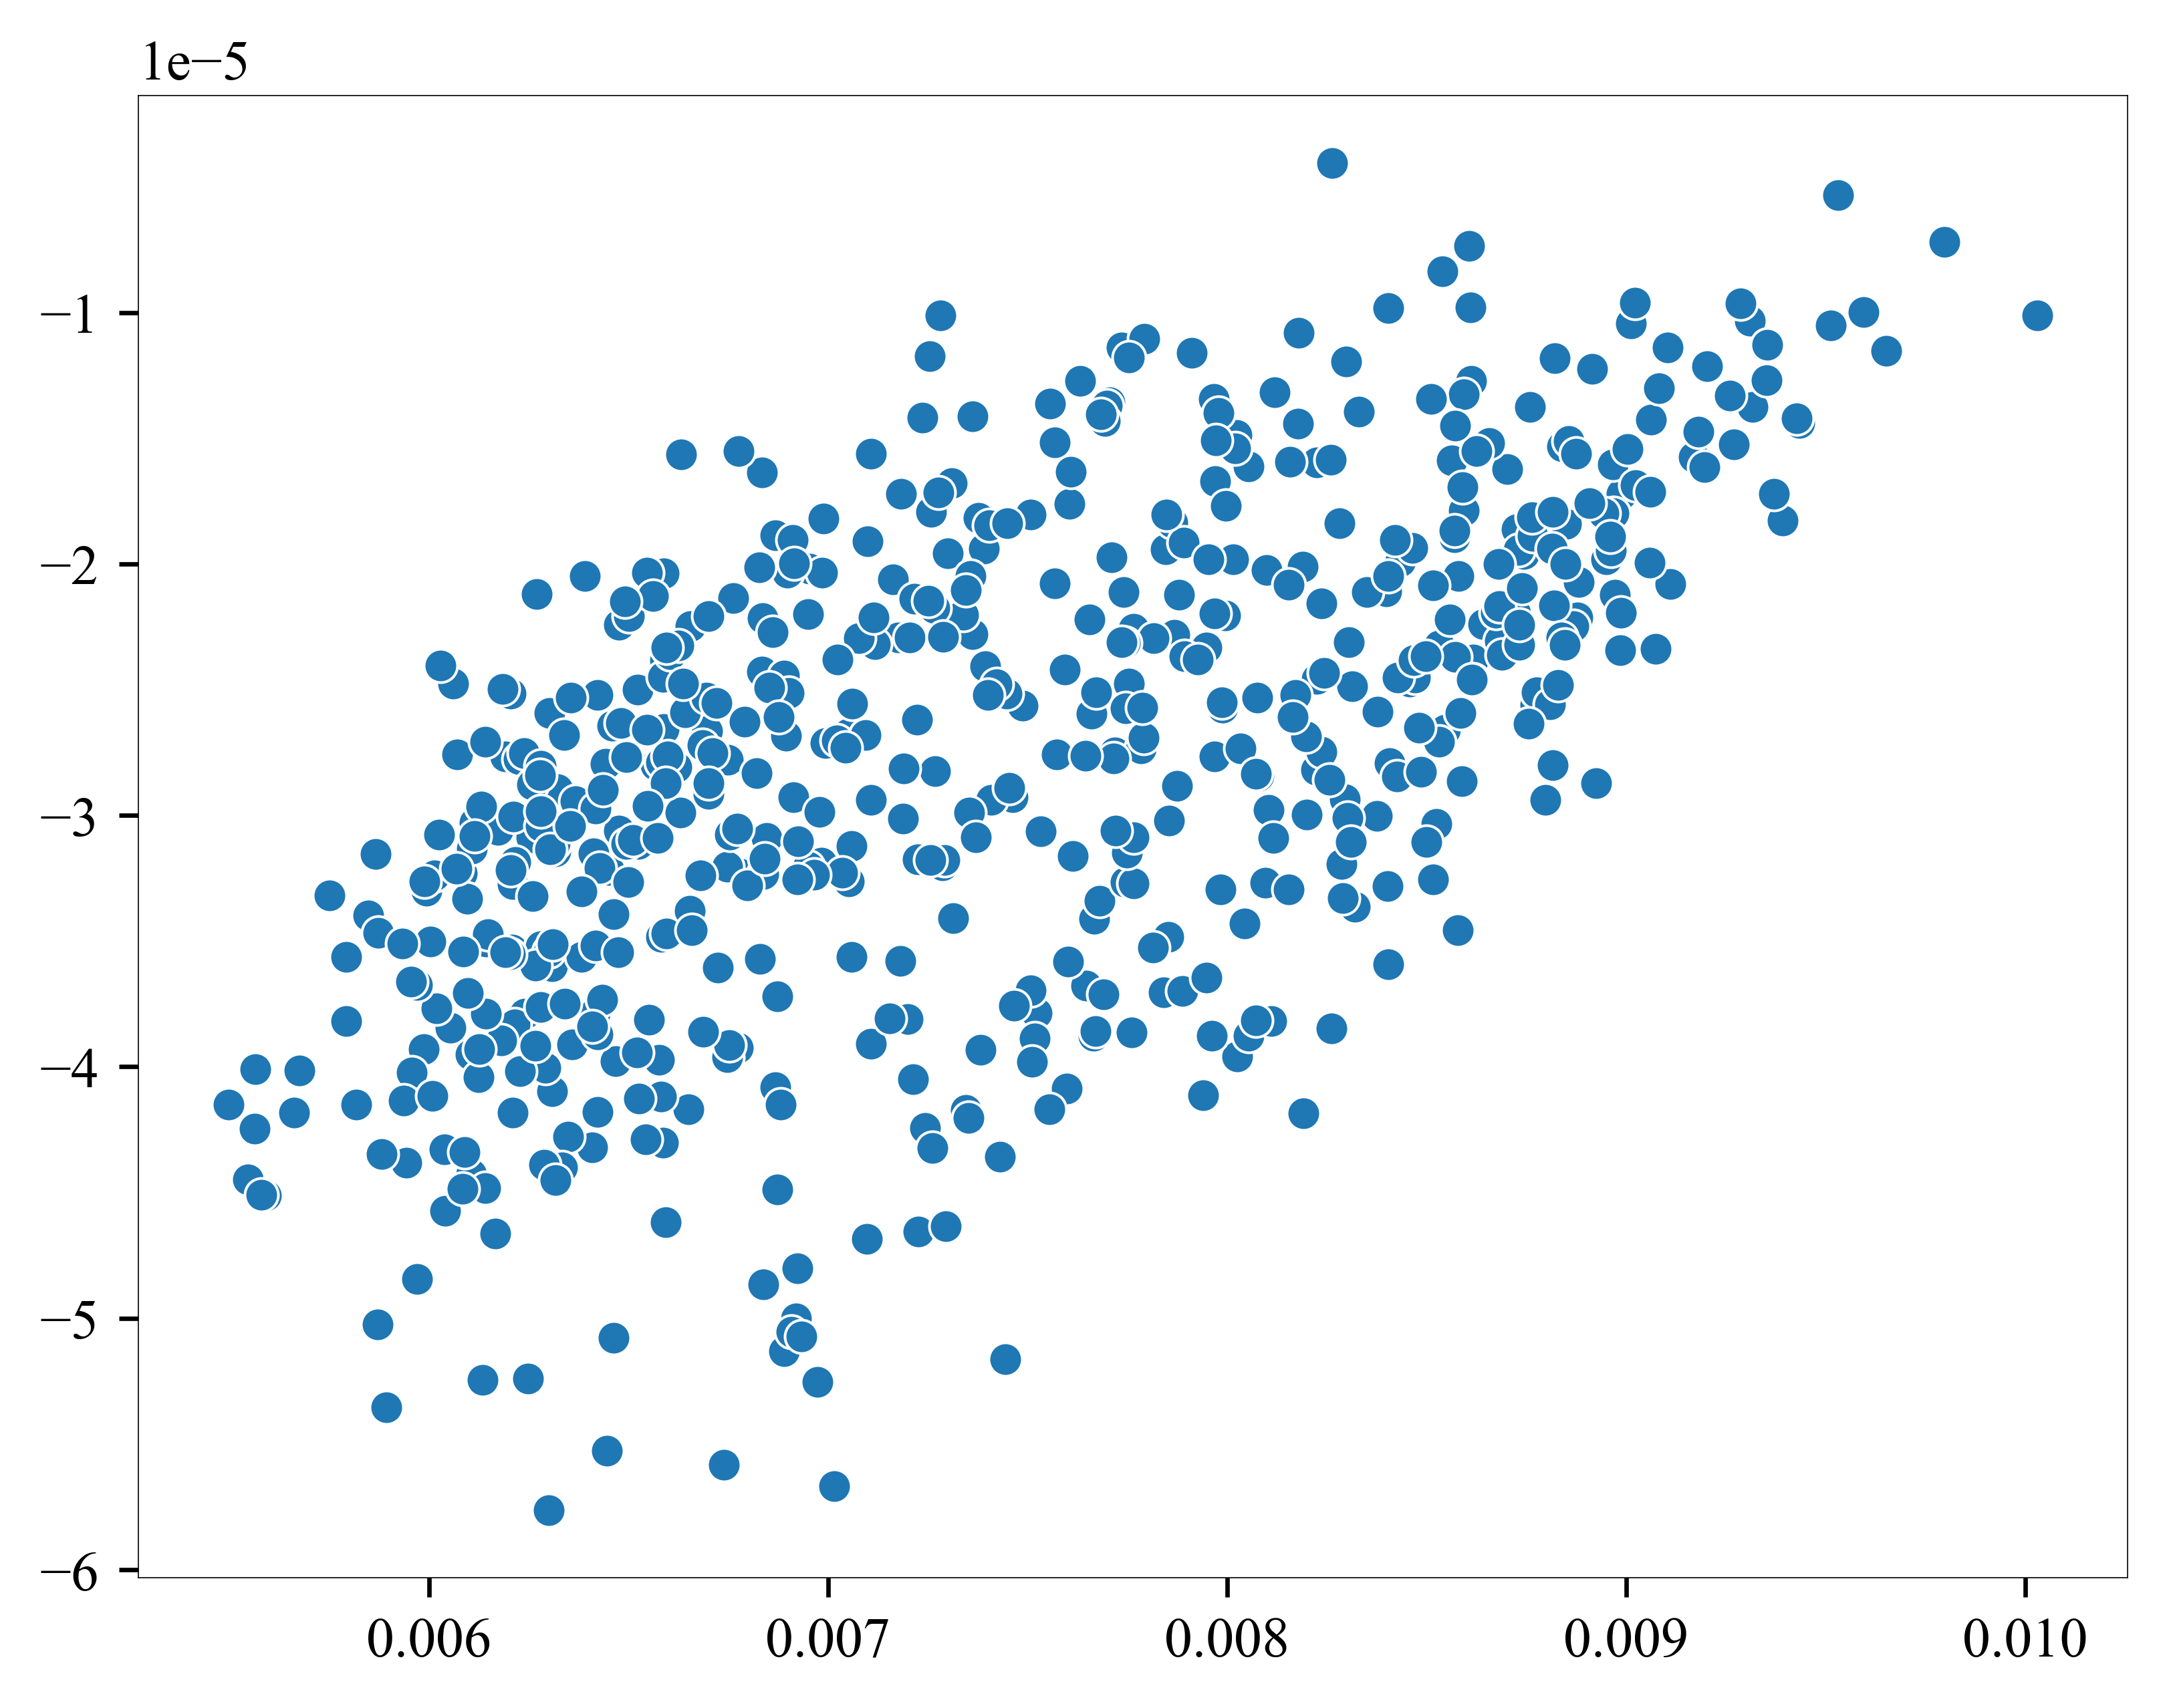

In [8]:
sns.scatterplot(
    q2m_alltime[expid[i]]['mon'].sel(
        lat=latitude, lon=longitude, method='nearest').values,
    evapwac_alltime[expid[i]]['mon'].sel(
        lat=latitude, lon=longitude, method='nearest').values,
)

[########################################] | 100% Completed | 5.01 sms


<AxesSubplot:>

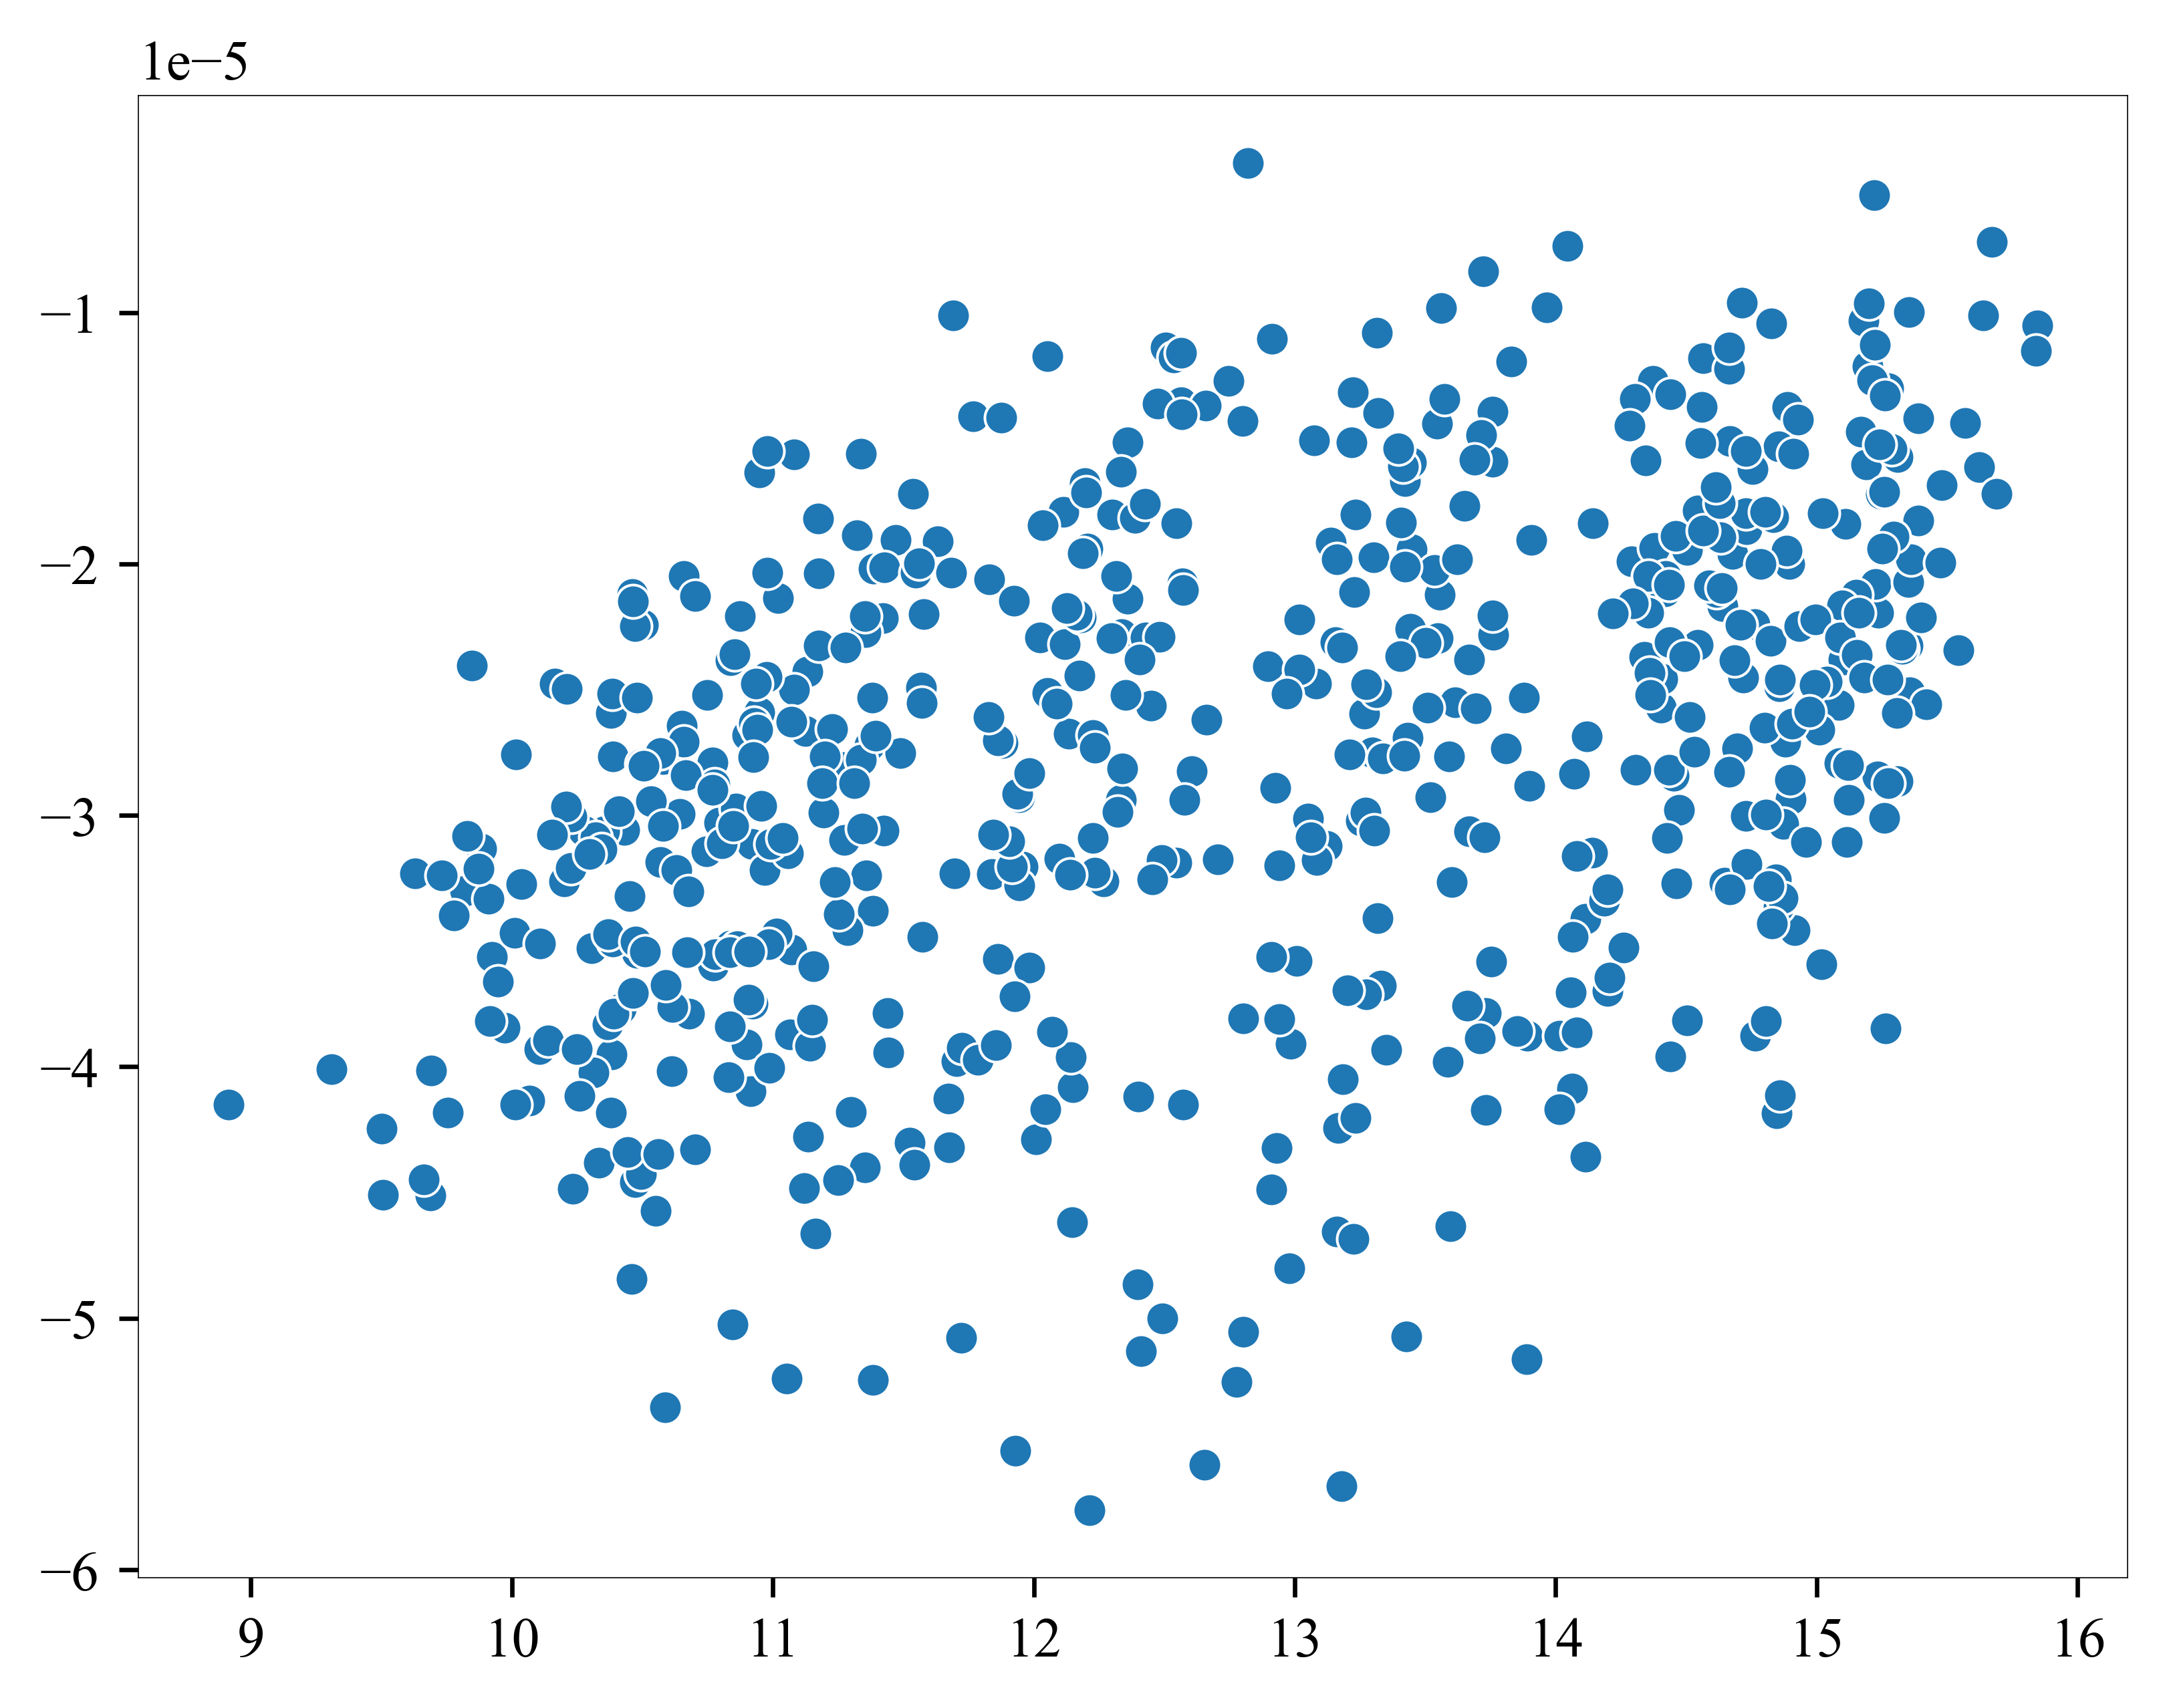

In [9]:
sns.scatterplot(
    temp2_alltime[expid[i]]['mon'].sel(
        lat=latitude, lon=longitude, method='nearest').values,
    evapwac_alltime[expid[i]]['mon'].sel(
        lat=latitude, lon=longitude, method='nearest').values,
)

[########################################] | 100% Completed | 5.19 sms


<AxesSubplot:>

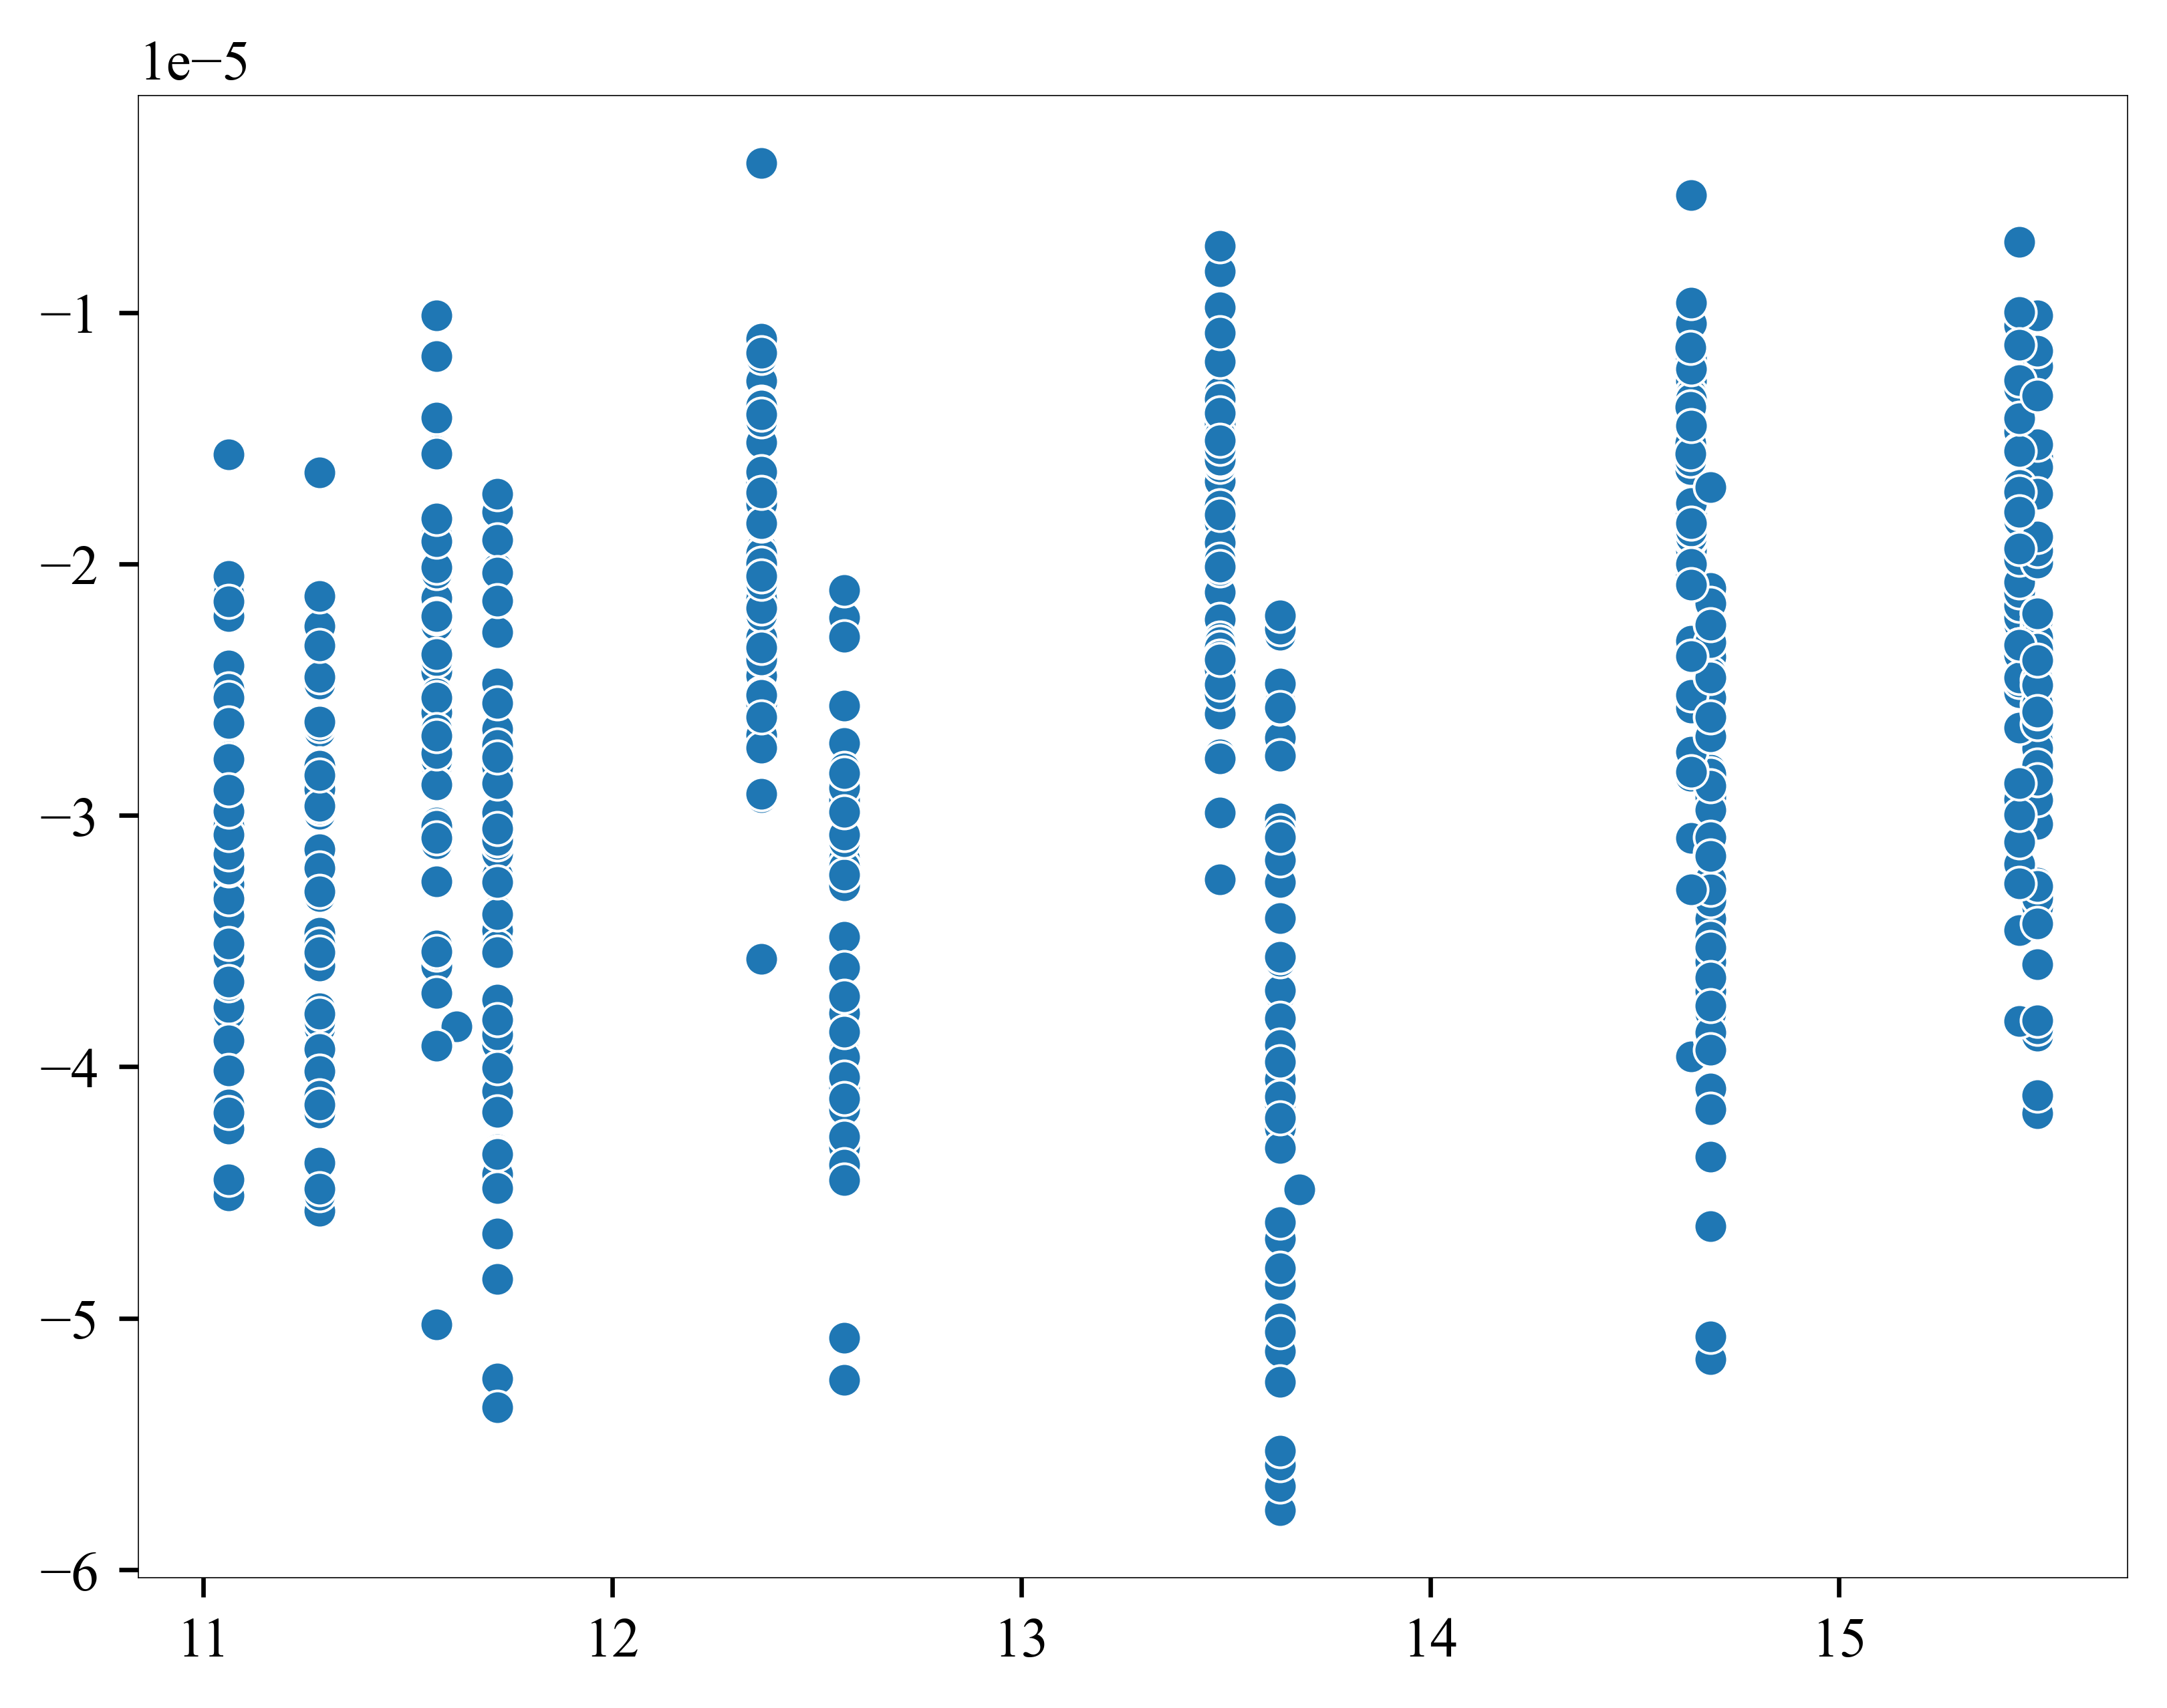

In [10]:
sns.scatterplot(
    tsw_alltime[expid[i]]['mon'].sel(
        lat=latitude, lon=longitude, method='nearest').values,
    evapwac_alltime[expid[i]]['mon'].sel(
        lat=latitude, lon=longitude, method='nearest').values,
)